<h1 style="color:red" align="center"> Projet d'introduction au Machine Learning <br/> Out-Of-Domain PoS Tagging </h1>

In [1]:
import dataAnalysis as da
import pandas as pds
import matplotlib.pyplot as plt
import numpy as np
pds.set_option('display.max_colwidth', -1)

In [2]:
dataAnalyse = da.dataAnalysis()
tweetDataSet = np.empty_like(da.listeCorpus, dtype=bool)
tweetDataSet[0] = True
tweetDataSet[8] = True
corpusDesc = {
                "nom du corpus" : da.listeCorpus,
                "Corpus de tweet": tweetDataSet,
                "exemple de phrases": dataAnalyse[0],
                "nombre de phrases" : dataAnalyse[1],
                "nombre d'éléments (mot, ponctuation, ..) dans le corpus": dataAnalyse[2],
                "nombre d'éléments unique (mot, ponctuation, ..) dans le corpus": dataAnalyse[3]
                }
corpusDataFrame = pds.DataFrame(data=corpusDesc)
corpusDataFrame.sort_values("nom du corpus", axis = 0, ascending = True, inplace = True, na_position ='last')
corpusDataFrame

,nom du corpus,Corpus de tweet,exemple de phrases,nombre de phrases,"nombre d'éléments (mot, ponctuation, ..) dans le corpus","nombre d'éléments unique (mot, ponctuation, ..) dans le corpus"
0,fr.foot.test.json,True,"[Barça - Juventus sa seras du gâteau pour le Barça BARRRCA __EMOTICON__ __EMOTICON__ __EMOTICON__, Barça // Juventus , je sens Neymar il va mettre son doublé ., Barça B draw 1–1 with Racing , settle for insufficient point ✪ __URL__ __URL__]",743,13985,2638
4,fr.ftb.dev.json,True,"[Nous prions les cinéastes et tous nos lecteurs de bien vouloir nous en excuser ., La diffusion des prévisions météorologiques était fortement perturbée , mardi __DIGIT__ janvier , par le mouvement de grève nationale de trente - six heures déclenché la veille au soir , à l' appel des délégués CGT , CFDT et FO du personnel technique de Météo - France ., Par cette action , ces derniers veulent dénoncer la baisse des effectifs qui se traduit , affirment -ils , par "" l' abandon de certaines tâches et le recours à la sous - traitance "" .]",1235,38763,6545
3,fr.ftb.test.json,True,"[La limite des intérêts des emprunts contractés depuis le __DIGIT__ septembre __DIGIT__ pour l' acquisition d' un logement neuf ( intérêts déductibles des impôts à raison de __DIGIT__ % ) est fixée à 20 000 francs pour les personnes seules contre 15 000 francs précédemment et à 40 000 francs pour les couples mariés soumis à une imposition commune , contre 30 000 francs précédemment ., Dans le cas où le contribuable a des personnes à charge , le plafond prévu pour les célibataires ou les personnes seules sera majoré dans les mêmes conditions que pour les couples mariés : le relèvement des limites est de 2 000 francs pour les personnes à charge , cette majoration étant portée à 2 500 francs pour le deuxième enfant à 3 000 francs pour chaque enfant à partir du troisième ., Article __DIGIT__ de la loi de finances rectificative pour __DIGIT__ : affectation d' un logement à l' usage d' habitation principale .]",2541,75073,9845
15,fr.ftb.train.json,False,"[Certes , rien ne dit qu' une seconde motion de censure sur son projet de loi , reprenant l' accord du __DIGIT__ avril , n' aurait pas été la bonne mais cette probabilité , reconnaissent les socialistes , n' était pas la plus plausible ., Toujours est -il que le gouvernement a cédé alors que ses adversaires politiques ne proposent aucune solution alternative et considèrent , avec un bel ensemble , que la défense des intérêts des malades passe par le maintien d' un système qui aboutit à multiplier les actes inutiles et au dépassement généralisé des honoraires de la "" Sécu "" ., Du coup , il s' est incliné devant le corporatisme des représentants du corps médical ( qui traversent la même crise de représentativité que les syndicalistes du monde salarié ) , plus préoccupés par leurs rivalités internes que par les attentes des médecins à la recherche de règles du jeu claires et acceptables .]",14759,442228,27127
11,fr.gsd.dev.json,True,"[Aviator , un film sur la vie de Hughes ., Les études durent six ans mais leur contenu diffère donc selon les Facultés ., Mais comment faire dans un contexte structurellement raciste ?]",1476,34664,8964
1,fr.gsd.test.json,True,"[Je sens qu' entre ça et les films de médecins et scientifiques fous que nous avons déjà vus , nous pourrions emprunter un autre chemin pour l' origine ., On pourra toujours parler à propos d' Averroès de "" décentrement du Sujet "" ., « Il a été largement démontré que la population civile du territoire non autonome du Sahara occidental est l' objet de diverses atteintes aux droits humains , comme la détention arbitraire , les coups et les tortures » , écrit l' ONG internationale , implantée dans __DIGIT__ pays , citée par l' agence de presse sahraouie .]",416,9742,3172
13,fr.gsd.train.json,True,"[Les commotions cérébrales sont devenu si courantes dans ce sport qu' on les considére presque comme la routine ., L' œuvre est située dans la galerie des batailles , dans le c

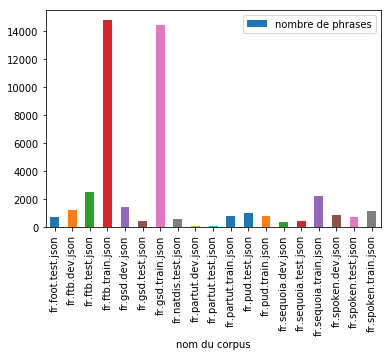

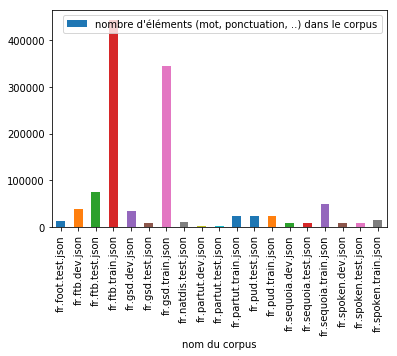

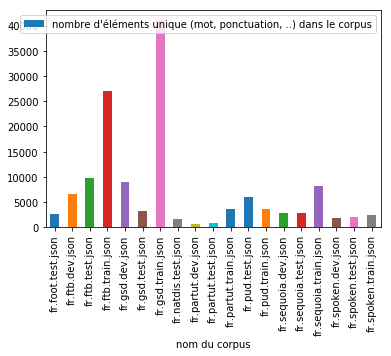

In [3]:
corpusDataFrame.plot(kind='bar',x='nom du corpus',y='nombre de phrases')
corpusDataFrame.plot(kind='bar',x='nom du corpus',y='nombre d\'éléments (mot, ponctuation, ..) dans le corpus')
corpusDataFrame.plot(kind='bar',x='nom du corpus',y='nombre d\'éléments unique (mot, ponctuation, ..) dans le corpus')

## Out of vocabulary words

Ce sont les mots qui apparaissent dans l'ensemble de test et pas dans l'ensemble d'apprentissage. Ainsi, 
plus le pourcentage est faible, plus l'ensemble de test et d'apprentissage ont un vocabulaire proche.
Inversement, un pourcentage élevé indique une grande différence entre le vocabulaires de l'ensemble
d'apprentissage et de l'ensemble de test.

On s'attend à avoir de meilleurs résultat lorsque le pourcentage est faible.

In [4]:
oovResult = da.computeOOV()
oovDataFrame = pds.DataFrame(data={"test corpus": oovResult[1],
                                   "OOV percentage": oovResult[2]},
                                    index=oovResult[0])

for corpus in da.listeCorpus:
    if corpus in oovDataFrame.index:
        subDF = oovDataFrame.loc[corpus,:]
        if len(subDF.index) > 2:
            subDF.sort_values("OOV percentage", axis = 0, ascending = True, inplace = True, na_position ='last')
        display(subDF)

/home/fusroman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,test corpus,OOV percentage
fr.foot.test.json,fr.partut.dev.json,14.136594
fr.foot.test.json,fr.partut.test.json,16.391544
fr.foot.test.json,fr.natdis.test.json,26.141954
fr.foot.test.json,fr.spoken.dev.json,30.251545
fr.foot.test.json,fr.spoken.test.json,31.918579
fr.foot.test.json,fr.spoken.train.json,36.984711
fr.foot.test.json,fr.sequoia.dev.json,42.749217
fr.foot.test.json,fr.sequoia.test.json,42.949640
fr.foot.test.json,fr.gsd.test.json,43.631670
fr.foot.test.json,fr.pud.train.json,48.668662


,test corpus,OOV percentage
fr.gsd.test.json,fr.partut.dev.json,10.007718
fr.gsd.test.json,fr.partut.test.json,11.637823
fr.gsd.test.json,fr.natdis.test.json,23.547783
fr.gsd.test.json,fr.spoken.dev.json,24.378208
fr.gsd.test.json,fr.spoken.test.json,25.737578
fr.gsd.test.json,fr.spoken.train.json,30.187686
fr.gsd.test.json,fr.sequoia.dev.json,33.215903
fr.gsd.test.json,fr.sequoia.test.json,34.000656
fr.gsd.test.json,fr.partut.train.json,38.206656
fr.gsd.test.json,fr.pud.train.json,38.206656


,test corpus,OOV percentage
fr.sequoia.train.json,fr.partut.test.json,2.466667
fr.sequoia.train.json,fr.partut.dev.json,2.674157
fr.sequoia.train.json,fr.sequoia.dev.json,7.289958
fr.sequoia.train.json,fr.sequoia.test.json,7.661835
fr.sequoia.train.json,fr.spoken.dev.json,8.949301
fr.sequoia.train.json,fr.natdis.test.json,9.168704
fr.sequoia.train.json,fr.spoken.test.json,9.198229
fr.sequoia.train.json,fr.spoken.train.json,12.058988
fr.sequoia.train.json,fr.pud.train.json,13.687574
fr.sequoia.train.json,fr.partut.train.json,13.687574


,test corpus,OOV percentage
fr.ftb.test.json,fr.partut.test.json,1.866792
fr.ftb.test.json,fr.partut.dev.json,2.225379
fr.ftb.test.json,fr.spoken.dev.json,6.823409
fr.ftb.test.json,fr.spoken.test.json,7.247357
fr.ftb.test.json,fr.natdis.test.json,7.310910
fr.ftb.test.json,fr.spoken.train.json,9.140133
fr.ftb.test.json,fr.sequoia.dev.json,10.052240
fr.ftb.test.json,fr.sequoia.test.json,10.370486
fr.ftb.test.json,fr.pud.train.json,10.432345
fr.ftb.test.json,fr.partut.train.json,10.432345


,test corpus,OOV percentage
fr.ftb.dev.json,fr.partut.test.json,3.546196
fr.ftb.dev.json,fr.partut.dev.json,4.173554
fr.ftb.dev.json,fr.spoken.dev.json,11.340206
fr.ftb.dev.json,fr.spoken.test.json,11.554252
fr.ftb.dev.json,fr.natdis.test.json,12.010763
fr.ftb.dev.json,fr.spoken.train.json,15.065021
fr.ftb.dev.json,fr.sequoia.dev.json,16.027427
fr.ftb.dev.json,fr.sequoia.test.json,16.446604
fr.ftb.dev.json,fr.pud.train.json,17.856446
fr.ftb.dev.json,fr.partut.train.json,17.856446


,test corpus,OOV percentage
fr.spoken.test.json,fr.partut.dev.json,17.328386
fr.spoken.test.json,fr.partut.test.json,19.069767
fr.spoken.test.json,fr.spoken.dev.json,31.362932
fr.spoken.test.json,fr.natdis.test.json,33.951814
fr.spoken.test.json,fr.spoken.train.json,38.744733
fr.spoken.test.json,fr.sequoia.dev.json,46.781296
fr.spoken.test.json,fr.sequoia.test.json,47.450020
fr.spoken.test.json,fr.pud.train.json,51.678678
fr.spoken.test.json,fr.partut.train.json,51.678678
fr.spoken.test.json,fr.pud.test.json,63.577154


,test corpus,OOV percentage
fr.pud.train.json,fr.partut.train.json,0.000000
fr.pud.train.json,fr.partut.test.json,4.995579
fr.pud.train.json,fr.partut.dev.json,6.080470
fr.pud.train.json,fr.natdis.test.json,20.617978
fr.pud.train.json,fr.spoken.dev.json,20.810280
fr.pud.train.json,fr.spoken.train.json,25.921770
fr.pud.train.json,fr.sequoia.dev.json,26.146507
fr.pud.train.json,fr.sequoia.test.json,27.250792
fr.pud.train.json,fr.pud.test.json,44.908885
fr.pud.train.json,fr.gsd.dev.json,56.411268


,test corpus,OOV percentage
fr.spoken.train.json,fr.partut.dev.json,12.946979
fr.spoken.train.json,fr.partut.test.json,15.281100
fr.spoken.train.json,fr.spoken.dev.json,23.581280
fr.spoken.train.json,fr.natdis.test.json,28.317308
fr.spoken.train.json,fr.sequoia.dev.json,40.109064
fr.spoken.train.json,fr.sequoia.test.json,40.909925
fr.spoken.train.json,fr.partut.train.json,44.838089
fr.spoken.train.json,fr.pud.test.json,57.295207
fr.spoken.train.json,fr.gsd.dev.json,67.119116
fr.spoken.train.json,fr.ftb.train.json,85.058673


,test corpus,OOV percentage
fr.natdis.test.json,fr.partut.dev.json,20.716113
fr.natdis.test.json,fr.partut.test.json,24.325429
fr.natdis.test.json,fr.spoken.dev.json,42.553191
fr.natdis.test.json,fr.sequoia.dev.json,53.257919
fr.natdis.test.json,fr.sequoia.test.json,53.459258
fr.natdis.test.json,fr.partut.train.json,59.531835
fr.natdis.test.json,fr.pud.test.json,69.875573
fr.natdis.test.json,fr.gsd.dev.json,77.725342
fr.natdis.test.json,fr.ftb.train.json,90.760832
fr.natdis.test.json,fr.gsd.train.json,93.588272


,test corpus,OOV percentage
fr.partut.dev.json,fr.partut.test.json,38.954248
fr.partut.dev.json,fr.spoken.dev.json,63.549253
fr.partut.dev.json,fr.sequoia.dev.json,70.662100
fr.partut.dev.json,fr.sequoia.test.json,71.322519
fr.partut.dev.json,fr.partut.train.json,73.756781
fr.partut.dev.json,fr.pud.test.json,82.988540
fr.partut.dev.json,fr.gsd.dev.json,87.746668
fr.partut.dev.json,fr.ftb.train.json,95.348754
fr.partut.dev.json,fr.gsd.train.json,96.788475


,test corpus,OOV percentage
fr.sequoia.test.json,fr.partut.test.json,11.078405
fr.sequoia.test.json,fr.spoken.dev.json,27.325581
fr.sequoia.test.json,fr.sequoia.dev.json,28.243740
fr.sequoia.test.json,fr.partut.train.json,39.119288
fr.sequoia.test.json,fr.pud.test.json,53.786691
fr.sequoia.test.json,fr.gsd.dev.json,63.696786
fr.sequoia.test.json,fr.ftb.train.json,83.021066
fr.sequoia.test.json,fr.gsd.train.json,88.225667


,test corpus,OOV percentage
fr.gsd.dev.json,fr.partut.test.json,3.129154
fr.gsd.dev.json,fr.spoken.dev.json,8.030945
fr.gsd.dev.json,fr.sequoia.dev.json,12.413852
fr.gsd.dev.json,fr.partut.train.json,14.945159
fr.gsd.dev.json,fr.pud.test.json,22.648316
fr.gsd.dev.json,fr.ftb.train.json,60.677177
fr.gsd.dev.json,fr.gsd.train.json,69.168199


,test corpus,OOV percentage
fr.sequoia.dev.json,fr.partut.test.json,11.736959
fr.sequoia.dev.json,fr.spoken.dev.json,28.165706
fr.sequoia.dev.json,fr.partut.train.json,40.304709
fr.sequoia.dev.json,fr.pud.test.json,55.157512
fr.sequoia.dev.json,fr.ftb.train.json,83.804653
fr.sequoia.dev.json,fr.gsd.train.json,88.789585


,test corpus,OOV percentage
fr.gsd.train.json,fr.partut.test.json,0.188603
fr.gsd.train.json,fr.spoken.dev.json,0.791323
fr.gsd.train.json,fr.partut.train.json,1.359952
fr.gsd.train.json,fr.pud.test.json,2.933554
fr.gsd.train.json,fr.ftb.train.json,19.107318


,test corpus,OOV percentage
fr.pud.test.json,fr.partut.test.json,4.898079
fr.pud.test.json,fr.spoken.dev.json,12.686756
fr.pud.test.json,fr.partut.train.json,21.280758
fr.pud.test.json,fr.ftb.train.json,69.424406


,test corpus,OOV percentage
fr.ftb.train.json,fr.partut.test.json,0.264834
fr.ftb.train.json,fr.spoken.dev.json,1.509252
fr.ftb.train.json,fr.partut.train.json,2.078739


,test corpus,OOV percentage
fr.partut.test.json,fr.partut.train.json,68.965517
fr.partut.test.json,fr.spoken.dev.json,60.317460


test corpus       fr.spoken.dev.json
OOV percentage    20.8103           
Name: fr.partut.train.json, dtype: object